In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

##Loading Raw Data

In [3]:
df = pd.read_csv('1.04.+Real-life+example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


####PREPROCESSING

##Exploring the descriptive statistics of the variables

In [5]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


##Determining the variables of interest

In [6]:
data = df.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


##Dealing with missing values

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
ndf = data.dropna(axis=0)

In [10]:
ndf.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


##Exploring the PDF's

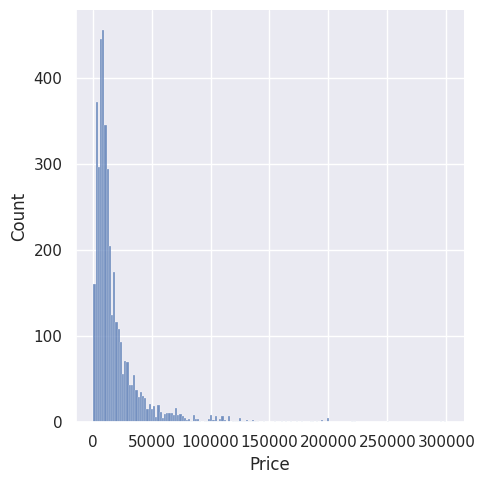

In [11]:
sns.displot(ndf['Price'])

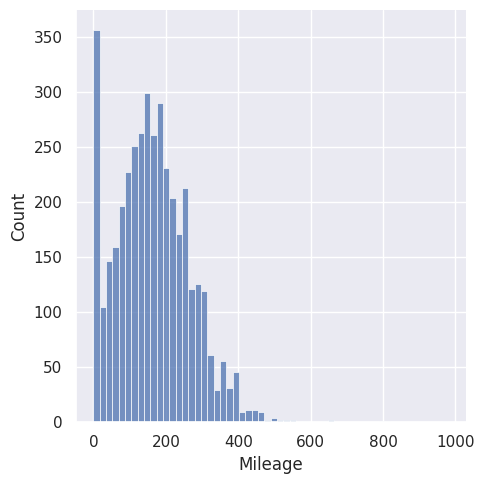

In [13]:
sns.displot(ndf['Mileage'])

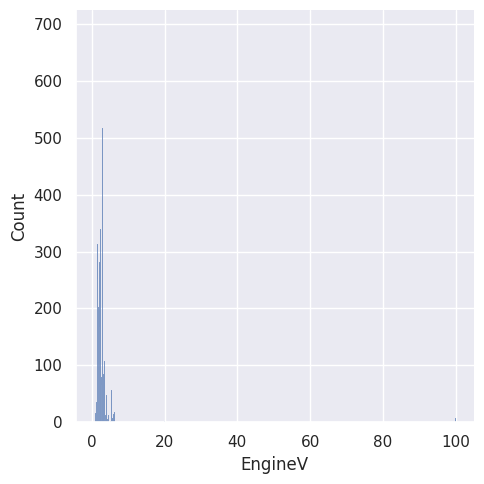

In [14]:
sns.displot(ndf['EngineV'])

##Dealing with Outliners

In [15]:
## Quantile method

q= ndf['Price'].quantile(0.99)
d1 = ndf[ndf['Price']<q]
d1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [24]:
q1= d1['Mileage'].quantile(0.99)
d2 = d1[d1['Mileage']<q1]
d2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [25]:
d3 = d2[d2['EngineV']<6.5]
d3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [27]:
data_cleaned = d3.reset_index(drop = True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


##Checking OLS Assumptions

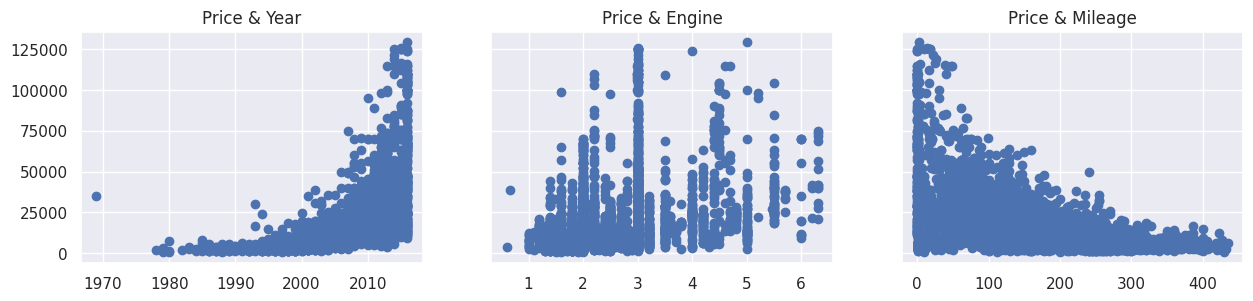

In [29]:
f1, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price & Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price & Engine')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price & Mileage')

plt.show()

##Relaxing the Assumptions

In [32]:
# log function on price to increase linearity

log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656,9.814656
...,...,...,...,...,...,...,...,...,...,...
3916,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556,9.792556
3917,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069,11.736069
3918,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557,8.779557
3919,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197,8.987197


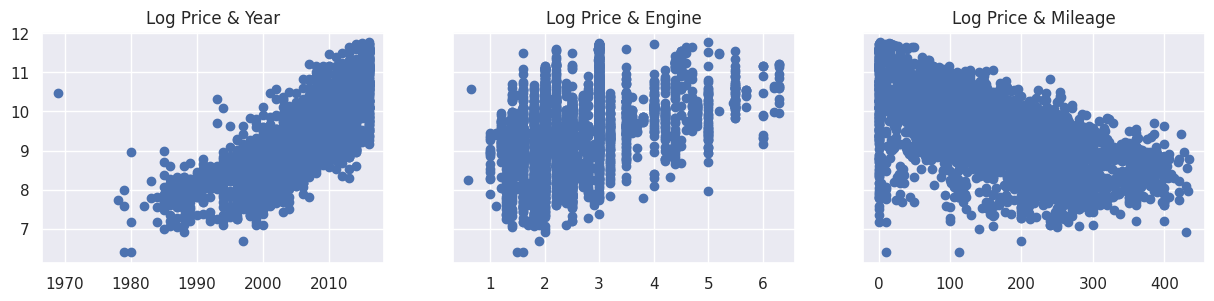

In [33]:
f1, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price & Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price & Engine')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax3.set_title('Log Price & Mileage')

plt.show()

In [34]:
data_cleaned = data_cleaned.drop(['Price'] , axis =1)

##MultiCollinearity

In [35]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log price', 'Log Price'], dtype=object)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [38]:
vif

,VIF,features
0,3.791073,Mileage
1,10.397185,Year
2,7.671170,EngineV


In [39]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [40]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [41]:
data_with_dummies.head()

,Mileage,EngineV,log price,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [42]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log price', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [44]:
cols = ['Log Price',  'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [45]:
data_preprocesses = data_with_dummies[cols]
data_preprocesses.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


##Linear Regression

##Declare inputs and targets

In [46]:
targets = data_preprocesses['Log Price']
inputs = data_preprocesses.drop(['Log Price'], axis=1)

##Scale the Data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [49]:
inputs_scaled = scaler.transform(inputs)

##Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size =0.2, random_state = 365)

##Regression

In [51]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [52]:
y_hat = reg.predict(x_train)

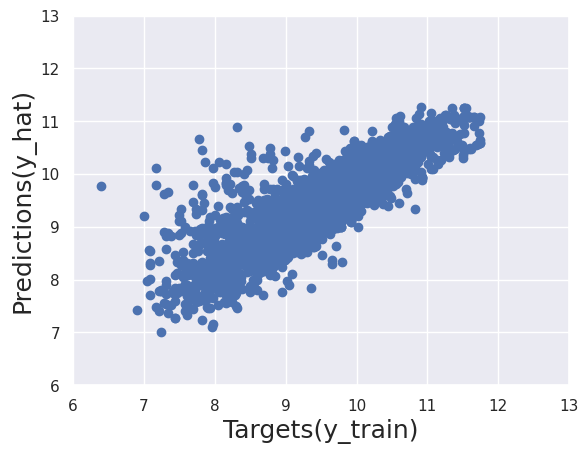

In [54]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets(y_train)",size=18)
plt.ylabel("Predictions(y_hat)",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals_PDF')

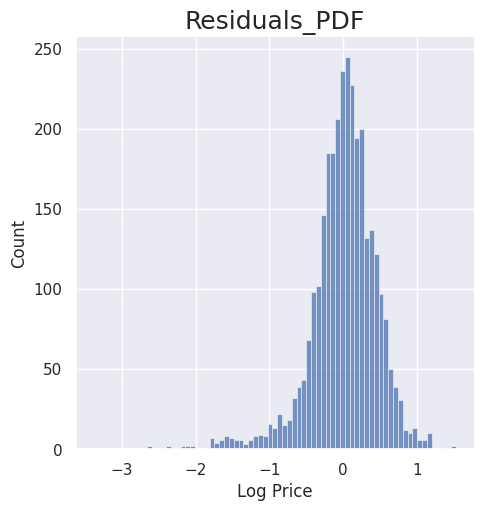

In [57]:
#Residual plot
sns.displot(y_train - y_hat)
plt.title("Residuals_PDF",size=18)

In [58]:
reg.score(x_train, y_train)

0.7262985119939247

##Finding the Weights and Bias

In [59]:
reg.intercept_

9.3945175650554

In [61]:
reg.coef_

array([-0.45850621,  0.22118353,  0.02385727,  0.01482004, -0.12502118,
       -0.17463561, -0.05054421, -0.08369427, -0.16029143, -0.10388223,
       -0.19829007, -0.12207963, -0.15555148, -0.13027198, -0.03371434,
       -0.15241012,  0.30673013])

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458506
1,EngineV,0.221184
2,Brand_BMW,0.023857
3,Brand_Mercedes-Benz,0.014820
4,Brand_Mitsubishi,-0.125021
5,Brand_Renault,-0.174636
6,Brand_Toyota,-0.050544
7,Brand_Volkswagen,-0.083694
8,Body_hatch,-0.160291
9,Body_other,-0.103882


##Testing

In [63]:
y_hat_test = reg.predict(x_test)

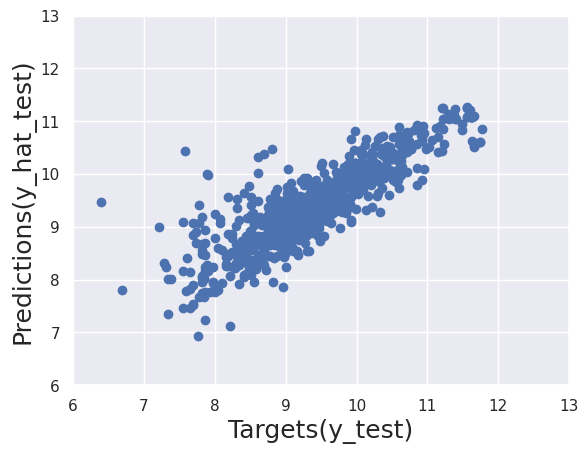

In [64]:
plt.scatter(y_test,y_hat_test)
plt.xlabel("Targets(y_test)",size=18)
plt.ylabel("Predictions(y_hat_test)",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [65]:
df_pf = pd.DataFrame(y_hat_test, columns=["Predictions"])
df_pf.head()

,Predictions
0,9.020395
1,9.894089
2,8.586029
3,9.431078
4,8.655797


In [66]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,9.020395,NaN
1,9.894089,7900.0
2,8.586029,NaN
3,9.431078,NaN
4,8.655797,NaN
...,...,...
780,9.381368,NaN
781,8.609664,NaN
782,9.330164,NaN
783,9.111091,NaN


In [68]:
#reset ytest indices to avoid dfpf to match and create null vals
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.942461
1    9.433484
2    8.517193
3    9.104869
4    8.779557
Name: Log Price, dtype: float64

In [69]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,9.020395,7650.0
1,9.894089,12500.0
2,8.586029,5000.0
3,9.431078,8999.0
4,8.655797,6500.0
...,...,...
780,9.381368,7750.0
781,8.609664,7500.0
782,9.330164,13200.0
783,9.111091,10900.0


In [71]:
#examining optimization algo

df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [73]:
df_pf['Difference %'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,Difference %
0,9.020395,7650.0,7640.979605,99.882086
1,9.894089,12500.0,12490.105911,99.920847
2,8.586029,5000.0,4991.413971,99.828279
3,9.431078,8999.0,8989.568922,99.895199
4,8.655797,6500.0,6491.344203,99.866834
...,...,...,...,...
780,9.381368,7750.0,7740.618632,99.878950
781,8.609664,7500.0,7491.390336,99.885204
782,9.330164,13200.0,13190.669836,99.929317
783,9.111091,10900.0,10890.888909,99.916412


In [76]:
df_pf.describe()

,Predictions,Target,Residual,Difference %
count,785.000000,785.000000,785.000000,785.000000
mean,9.391902,18435.820803,18426.428900,99.889826
std,0.763040,21457.586797,21457.023395,0.110393
min,6.935571,600.000000,590.536556,98.422759
25%,8.931624,6999.000000,6990.014533,99.869754
50%,9.359018,11000.000000,10991.100361,99.917052
75%,9.880400,20500.000000,20490.443878,99.952715
max,11.278835,129222.000000,129211.151639,99.991605


##EXERCISES

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

In [ ]:
# Let's simply use the data_preprocessed and the VIF code from above
variables = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

In [ ]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

In [ ]:
# To solve this one, we must create a new variable with dummies, without dropping the first one
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity)#, drop_first=True)
data_with_dummies_new.head()

In [ ]:
# Let's simply drop 'log_price' from this new variable
variables = data_with_dummies_new.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif